# IRIS Flower Data Analysis

The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

In [7]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df = pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.100,3.500,1.400,0.200,Iris-setosa
1,4.900,3.000,1.400,0.200,Iris-setosa
2,4.700,3.200,1.300,0.200,Iris-setosa
3,4.600,3.100,1.500,0.200,Iris-setosa
4,5.000,3.600,1.400,0.200,Iris-setosa


Exploring the Data

In [8]:
def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("\n##################### Columns #####################")
    print(dataframe.columns)
    print("\n##################### Info #####################")
    dataframe.info()
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head())
    print("##################### Tail #####################")
    print(dataframe.tail())
    print("##################### NA #####################")
    print(dataframe.isnull().sum())

check_df(df)

##################### Shape #####################
(150, 5)

##################### Columns #####################
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

##################### Info #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
##################### Types #####################
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object
##################### Head #####################
   sepal_length  sepal_width  petal_le

# Univarite Variable Analysis

Veri setinin boyutu küçük olduğu için verisetinin genel resmine baktığımızda sayısal ve kategorik verileri görebiliyoruz.


##################### Categoric #####################
['species']

##################### Numeric #####################
['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

##################### Categoric But Cardinal #####################
[]

##################### Numeric But Categoric #####################
[]

##################### Columns Overview #####################
Observations: 150
Variables: 5
cat_cols: 1
num_cols: 4
cat_but_car: 0
num_but_cat: 0
                 species  Ratio
Iris-setosa           50 33.333
Iris-versicolor       50 33.333
Iris-virginica        50 33.333


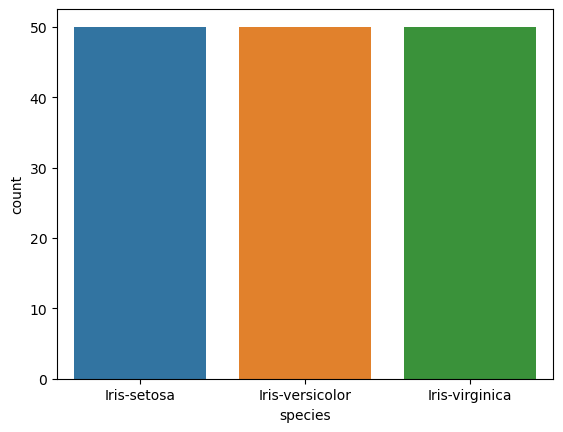

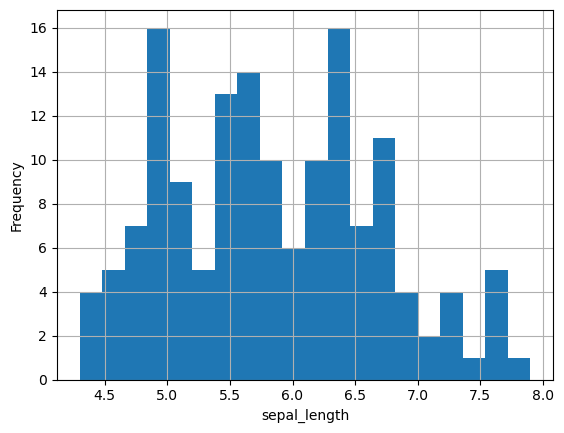

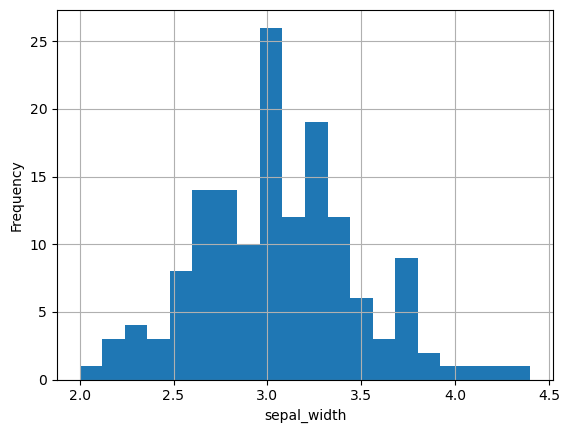

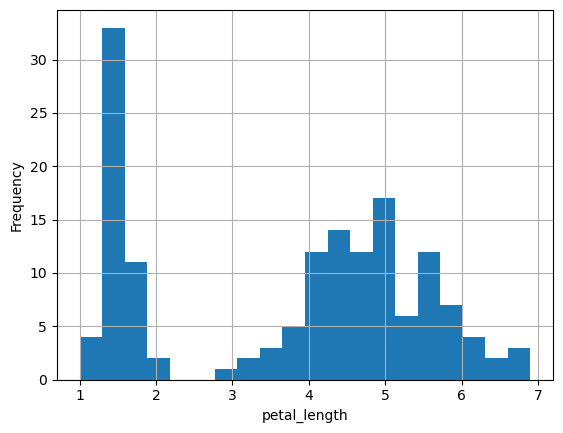

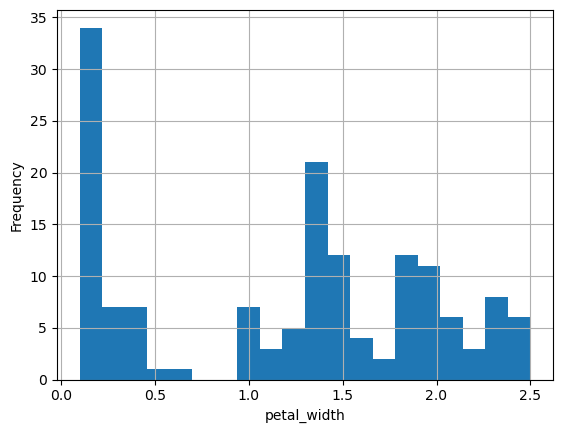

In [9]:
def column_detection(dataframe: pd.DataFrame, cat_th: int = 10, car_th: int = 20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                       dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                    dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print("\n##################### Categoric #####################")
    print(cat_cols)
    print("\n##################### Numeric #####################")
    print(num_cols)
    print("\n##################### Categoric But Cardinal #####################")
    print(cat_but_car)
    print("\n##################### Numeric But Categoric #####################")
    print(num_but_cat)
    print("\n##################### Columns Overview #####################")
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car, num_but_cat
cat_cols, num_cols, cat_but_car, num_but_cat = column_detection(df)

def cat_summary(dataframe, col_name, plot=True):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)


for col in cat_cols:
    cat_summary(df, col)


def hist_num_columns_show(dataframe, num_column):
    dataframe[num_column].hist(bins=20)
    plt.xlabel(num_column)
    plt.ylabel("Frequency")
    plt.show(block=True)


for num_col in num_cols:
    hist_num_columns_show(df, num_col)

# Visualization

In [10]:
species_counts = df['species'].value_counts()
species_counts

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

SEABORN 

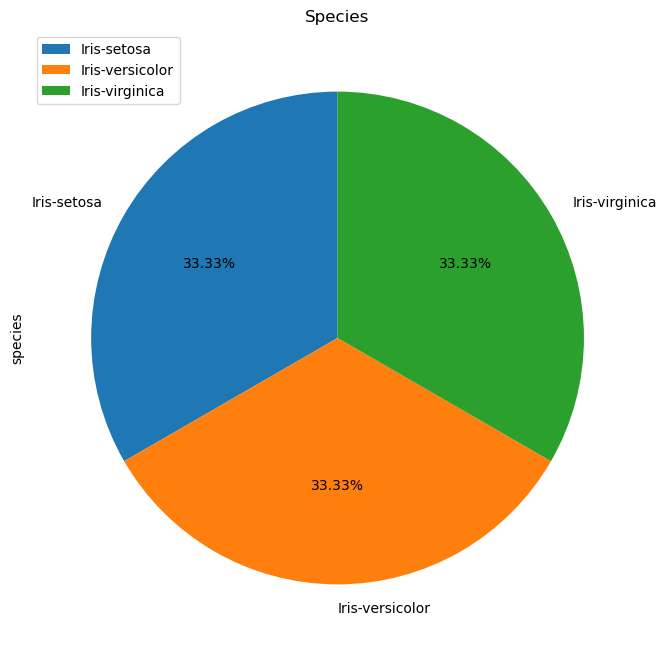

In [11]:
plt.figure(figsize=(8,8))
species_counts.plot(kind='pie', autopct='%1.2f%%', startangle=90)
plt.title('Species')
plt.legend(loc='upper left', labels=species_counts.index)
plt.show()

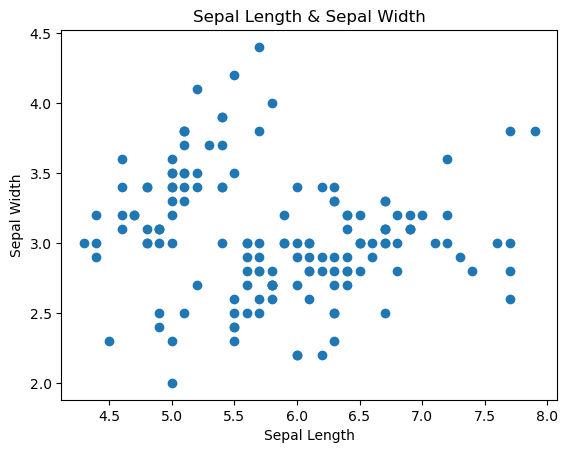

In [12]:
plt.scatter(df['sepal_length'], df['sepal_width'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length & Sepal Width')
plt.show()

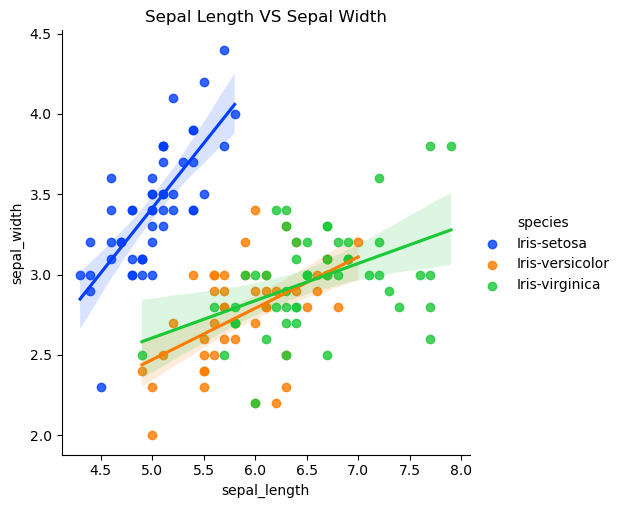

In [13]:
sns.lmplot(
    x="sepal_length",
    y="sepal_width",
    hue="species",
    palette="bright",
    data=df
)

plt.title("Sepal Length VS Sepal Width")
plt.show()

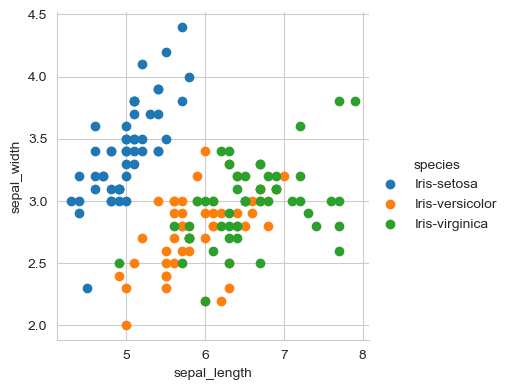

In [17]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="species", height=4) \
   .map(plt.scatter, "sepal_length","sepal_width") \
   .add_legend();
plt.show();

# Değişkenler Arası İlişkiler

<Axes: >

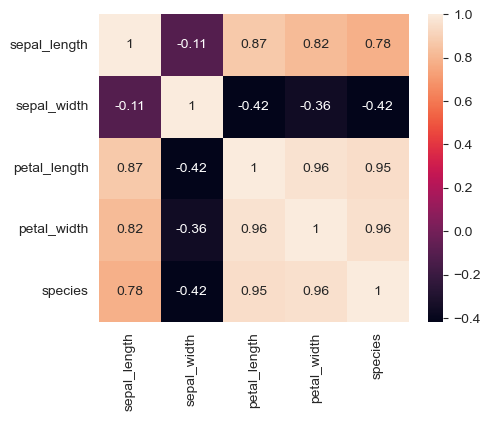

In [25]:
corr_df = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr_df, annot = True, ax = ax)

Label Encoding

Convert labels in form of categorical variables (string) to numeric form for machine readability.

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.700,3.000,5.200,2.300,2
146,6.300,2.500,5.000,1.900,2
147,6.500,3.000,5.200,2.000,2
148,6.200,3.400,5.400,2.300,2
149,5.900,3.000,5.100,1.800,2
